**Importing important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

**Reading and preprocessing the given dataset**

In [2]:
df= pd.read_csv('Churn_Modelling.csv',index_col=0)

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['Gender'].nunique()

2

In [7]:
df= pd.get_dummies(df, columns=['Gender'], prefix='Gender')

df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Gender_Female'] = df['Gender_Female'].astype(int)

df.head()

,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
df= df.join(pd.get_dummies(df['Geography'], prefix= 'Geo').astype('int'))
df.drop(['Geography'], axis=1, inplace= True)
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


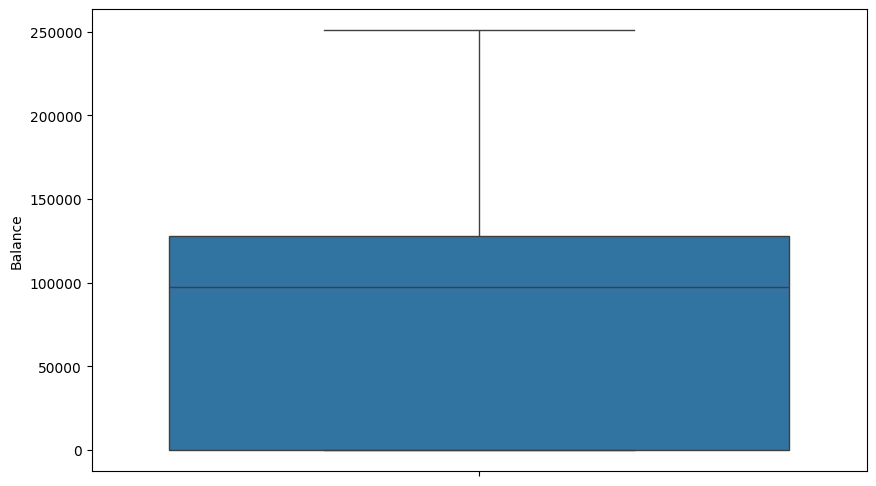

In [9]:
data=df['Balance']
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

In [10]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [11]:

X=df[['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','EstimatedSalary','Gender_Male','Gender_Female','Geo_France','Geo_Germany','Geo_Spain','IsActiveMember']]
y= df['Exited']


**Scaling the dataset**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
sc= StandardScaler()
df[["scaledbalance"]]=sc.fit_transform(df[["Balance"]])
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.5)
X_train_scld= sc.fit_transform(X_train)
X_test_scld= sc.transform(X_test)

**XGBClassifier performed the best with 86.38% accuracy**

**Performing Logistic Regression Model on the dataset**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(random_state=0)
model.fit(X_train_scld, y_train)

y_pred = model.predict(X_test_scld)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8076
Confusion Matrix:
[[3826  123]
 [ 839  212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3949
           1       0.63      0.20      0.31      1051

    accuracy                           0.81      5000
   macro avg       0.73      0.59      0.60      5000
weighted avg       0.78      0.81      0.77      5000



**Performing AdaBoostClassifier on the dataset**

In [14]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=1200, learning_rate=0.02, random_state=0)
model1 = abc.fit(X_train_scld, y_train)
y_pred1 = model1.predict(X_test_scld)

accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8564
Confusion Matrix:
[[3831  118]
 [ 600  451]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3949
           1       0.79      0.43      0.56      1051

    accuracy                           0.86      5000
   macro avg       0.83      0.70      0.74      5000
weighted avg       0.85      0.86      0.84      5000



**Performing  XGBClassifier on the dataset**

In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=345, learning_rate=0.02, random_state=0)
model11 = xgb.fit(X_train_scld, y_train)
y_pred2 = model11.predict(X_test_scld)

accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8606
Confusion Matrix:
[[3816  133]
 [ 564  487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3949
           1       0.79      0.46      0.58      1051

    accuracy                           0.86      5000
   macro avg       0.83      0.71      0.75      5000
weighted avg       0.85      0.86      0.85      5000



**Plotting the ROC-AUC curve for all three models**

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


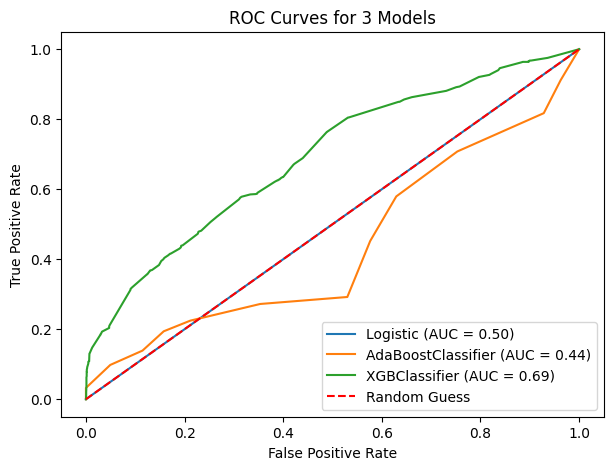

In [16]:
from sklearn.metrics import roc_curve, auc
y_pred_logistic = model.predict_proba(X_test)[:, 1]
y_pred_rf = model1.predict_proba(X_test)[:, 1]
y_pred_xgb = model11.predict_proba(X_test)[:, 1]
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'AdaBoostClassifier': y_pred_rf, 'XGBClassifier': y_pred_xgb})

plt.figure(figsize=(7, 5))
 
for model in ['Logistic', 'AdaBoostClassifier', 'XGBClassifier']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 3 Models')
plt.legend()
plt.show()